In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE, r2_score as R2
scaling = MinMaxScaler()
LRN = LinearRegression()
ridge = Ridge(alpha=.4)
lasso = Lasso(alpha=0.001)
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [3]:
df.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [4]:
df["date"] = pd.to_datetime(df.date, infer_datetime_format=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
df = df.drop(columns=["date","lights"])

In [9]:
reg_df = df[["T2","T6"]].sample(15, random_state =70)
reg_df1 = df[["T2","Appliances"]].sample(15, random_state = 60)
reg_df2 = df[["T6","Appliances"]].sample(15, random_state = 42)

<AxesSubplot:xlabel='T2', ylabel='T6'>

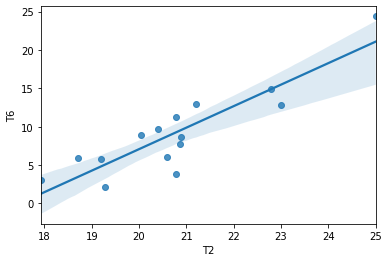

In [10]:
sns.regplot(x="T2", y="T6", data=reg_df)

<AxesSubplot:xlabel='T2', ylabel='Appliances'>

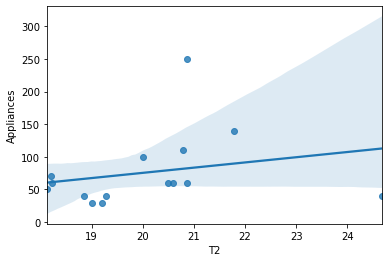

In [11]:
sns.regplot(x="T2", y="Appliances", data=reg_df1)

<AxesSubplot:xlabel='T6', ylabel='Appliances'>

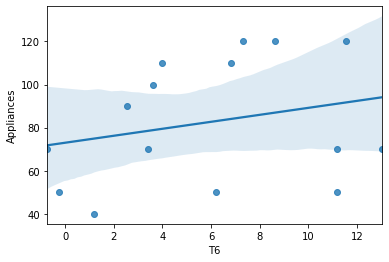

In [12]:
sns.regplot(x="T6", y="Appliances", data=reg_df2)

In [13]:
refined_df = pd.DataFrame(scaling.fit_transform(df), columns=df.columns)

In [14]:
refined_df.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.50000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.47619,0.894872,0.533937,0.372083,0.372083


In [15]:
defined_df = refined_df.drop(columns='Appliances')

In [16]:
defined_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [17]:
dropped_df = refined_df.Appliances

In [18]:
dropped_df

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = split(defined_df.T2.values.reshape(-1,1),defined_df.T6, test_size=.3,random_state=42)

In [20]:
modelling = LRN.fit(x_train,y_train)

In [21]:
modelling

LinearRegression()

In [22]:
pred_values = LRN.predict(x_test)

In [23]:
LRN.score(x_test,y_test)

0.6427789637197381

## Q13

In [24]:
mae = round(MAE(y_test,pred_values),2)
mae

0.08

## Q15

In [25]:
rmse = round(np.sqrt(MSE(y_test,pred_values)),3)
rmse

0.106

## Q12

In [26]:
r2 = round(R2(y_test,pred_values),2)
r2

0.64

## Q14

In [27]:
SS = y_test - pred_values
RSS = np.sum(np.square(SS))
round(RSS,2)

66.12

In [28]:
coefficient = round(metrics.r2_score(y_test,pred_values),2)
coefficient

0.64

In [29]:
defined_df = refined_df.drop(columns='Appliances')
dropped_df = refined_df.Appliances
x1_train, x1_test, y1_train, y1_test = split(defined_df, dropped_df, test_size=0.3, random_state=42)
LM1 = LinearRegression()
LM1.fit(x1_train, y1_train)

LinearRegression()

In [30]:
ridge.fit(x1_train, y1_train)

Ridge(alpha=0.4)

In [31]:
lasso.fit(x1_train,y1_train)

Lasso(alpha=0.001)

In [32]:
predicted_val = LM1.predict(x1_test)

In [33]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

## Q17

In [34]:
linear_model = get_weights_df(LM1, x1_train , 'Linear_Model_Weight')
linear_model.sort_values(by='Linear_Model_Weight', ascending=True)

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [35]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x1_train, y1_train)

Ridge(alpha=0.4)

In [36]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x1_train, y1_train)

Lasso(alpha=0.001)

In [37]:
predicted_values = ridge_reg.predict(x1_test)

In [38]:
RMSE_ridge = round(np.sqrt(metrics.mean_squared_error(y1_test, predicted_values)),3)
RMSE_linear = round(np.sqrt(metrics.mean_squared_error(y1_test, predicted_val)),3)

## Q18

In [39]:
RMSE_ridge

0.088

In [40]:
RMSE_linear

0.088

## Q19

In [41]:
lasso_weights = get_weights_df(lasso_reg, x1_train,"Lasso_Model_Weights")
lasso_weights[(lasso_weights["Lasso_Model_Weights"] < 0) | (lasso_weights["Lasso_Model_Weights"] > 0)].count()

Features               4
Lasso_Model_Weights    4
dtype: int64

In [42]:
predict1 = lasso_reg.predict(x1_test)
RMSE_lasso = round(np.sqrt(metrics.mean_squared_error(y1_test, predict1)),3)

## Q20

In [43]:
RMSE_lasso

0.094